In [1]:
import os
os.getcwd()

'/home/user13/user13/IA_1'

In [2]:
# Importing the necessary libraries.

import numpy as np # Importing numpy for numerical computation
import pandas as pd # Importing pandas for working with pre-processing and manipulation of dataframes
import matplotlib.pyplot as plt # Plotting library matplotlib
import seaborn as sns # Plotting library seaborn
from sklearn.linear_model import LogisticRegression # Importing logistic regression model
from sklearn.model_selection import train_test_split # Splitling in train and test set
from sklearn.linear_model import LogisticRegression # Importing logistic regression model
from sklearn.metrics import accuracy_score # Evaualating accuracy of logistic regression model

In [3]:
# Reading the comma seperated (csv) file using pandas library to dataframe using read_csv() function
df = pd.read_csv(r"/home/user13/user13/IA_1/ML Project 1 Dataset.csv") 
df

APP_ID   CIBIL_SCORE_VALUE  NEW_CUST  CUS_CATGCODE    EMPLOYMENT_TYPE   \
0       12345                    0      YES              1                  0   
1       12347                    0       NO              1                  1   
2       12349                    0      YES              1                  0   
3       12351                    2       NO              1                  1   
4       12353                    2       NO              1                  1   
5       12355                    0      YES              0                  1   
6       12357                    0      YES              1                  0   
7       12359                    0      YES              1                  1   
8       12361                    2       NO              1                  0   
9       12363                    0      YES              1                  1   
10      12365                    0      YES              0                  0   
11      12367                    1       NO              1                  1   
12      12369                    1       NO              1                  1   
13      12371                    2       NO              1                  1   
14      12373                    1       NO              0                  0   
15      12375                    2       NO              1                  1   
16      12377                    0      YES              1                  1   
17      12379                    1       NO              1                  1   
18      12381                    0      YES              1                  1   
19      12383                    0      YES              1                  1   
20      12385                    2       NO              1                  0   
21      12387                    2       NO              1                  0   
22      12389                    0      YES              1                  1   
23      12391                    0      YES              1                  0   
24      12393                    2       NO              0                  0   
25      12395                    0      YES              1                  0   
26      12397                    0      YES              1                  1   
27      12399                    1       NO              0                  0   
28      12401                    2       NO              1                  1   
29      12403                    0      YES              1                  0   
...       ...                  ...      ...            ...                ...   
13269   38883                    1       NO              0                  1   
13270   38885                    1       NO              1                  1   
13271   38887                    2       NO              1                  1   
13272   38889                    0       NO              1                  0   
13273   38891                    0       NO              1                  0   
13274   38893                    2       NO              1                  1   
13275   38895                    1       NO              0                  1   
13276   38897                    0      YES              1                  1   
13277   38899                    0      YES              1                  1   
13278   38901                    2       NO              1                  1   
13279   38903                    0      YES              1                  1   
13280   38905                    0      YES              1                  0   
13281   38907                    0      YES              1                  1   
13282   38909                    0      YES              1                  1   
13283   38911                    0      YES              1                  1   
13284   38913                    2       NO              0                  1   
13285   38915                    0      YES              1                  1   
13286   38917                    2    

In [4]:
df.isna().sum() # Checking if there is a any null or missing columns in the dataset.

APP_ID                 0
 CIBIL_SCORE_VALUE     0
NEW_CUST               0
CUS_CATGCODE           0
 EMPLOYMENT_TYPE       0
AGE                    0
 SEX                   0
 NO_OF_DEPENDENTS      0
 MARITAL               0
 EDU_QUA               0
  P_RESTYPE            0
 P_CATEGORY            0
 EMPLOYEE_TYPE         0
  MON_IN_OCC           0
 INCOM_EXP_GMI         0
LTV                    0
 TENURE                0
STATUS                 0
dtype: int64

In [5]:
# Removing all the unwanted white space from left and right of the columns.

df.rename(columns=lambda x: x.strip(), inplace=True)
df

APP_ID  CIBIL_SCORE_VALUE NEW_CUST  CUS_CATGCODE  EMPLOYMENT_TYPE  AGE  \
0       12345                  0      YES             1                0   31   
1       12347                  0       NO             1                1   40   
2       12349                  0      YES             1                0   27   
3       12351                  2       NO             1                1   33   
4       12353                  2       NO             1                1   29   
5       12355                  0      YES             0                1   26   
6       12357                  0      YES             1                0   27   
7       12359                  0      YES             1                1   38   
8       12361                  2       NO             1                0   25   
9       12363                  0      YES             1                1   26   
10      12365                  0      YES             0                0   21   
11      12367                  1       NO             1                1   38   
12      12369                  1       NO             1                1   42   
13      12371                  2       NO             1                1   34   
14      12373                  1       NO             0                0   33   
15      12375                  2       NO             1                1   42   
16      12377                  0      YES             1                1   21   
17      12379                  1       NO             1                1   33   
18      12381                  0      YES             1                1   29   
19      12383                  0      YES             1                1   28   
20      12385                  2       NO             1                0   38   
21      12387                  2       NO             1                0   27   
22      12389                  0      YES             1                1   24   
23      12391                  0      YES             1                0   53   
24      12393                  2       NO             0                0   27   
25      12395                  0      YES             1                0   30   
26      12397                  0      YES             1                1   25   
27      12399                  1       NO             0                0   24   
28      12401                  2       NO             1                1   35   
29      12403                  0      YES             1                0   50   
...       ...                ...      ...           ...              ...  ...   
13269   38883                  1       NO             0                1   41   
13270   38885                  1       NO             1                1   44   
13271   38887                  2       NO             1                1   26   
13272   38889                  0       NO             1                0   26   
13273   38891                  0       NO             1                0   54   
13274   38893                  2       NO             1                1   28   
13275   38895                  1       NO             0                1   30   
13276   38897                  0      YES             1                1   21   
13277   38899                  0      YES             1                1   41   
13278   38901                  2       NO             1                1   41   
13279   38903                  0      YES             1                1   23   
13280   38905                  0      YES             1                0   31   
13281   38907                  0      YES             1                1   26   
13282   38909                  0      YES             1                1   24   
13283   38911                  0      YES             1                1   20   
13284   38913                  2       NO             0                1   29   
13285   38915                  0      YES             1                1   32   
13286   38917                  2      

In [131]:
df.dtypes

APP_ID                 int64
CIBIL_SCORE_VALUE      int64
NEW_CUST              object
CUS_CATGCODE           int64
EMPLOYMENT_TYPE        int64
AGE                    int64
SEX                   object
NO_OF_DEPENDENTS       int64
MARITAL                int64
EDU_QUA                int64
P_RESTYPE              int64
P_CATEGORY             int64
EMPLOYEE_TYPE          int64
MON_IN_OCC             int64
INCOM_EXP_GMI          int64
LTV                  float64
TENURE                 int64
STATUS                 int64
dtype: object

In [6]:
print("Unique values for 'New_CUST': ", set(df["NEW_CUST"]))
print("Unique values for 'SEX': ",set(df["SEX"]))

Unique values for 'New_CUST':  {'YES', 'NO'}
Unique values for 'SEX':  {'F', 'M'}


In [7]:
df["NEW_CUST"] = df["NEW_CUST"].apply(lambda x : 1 if x == "YES" else 0)
df["SEX"] = df["SEX"].apply(lambda x : 1 if x == "F" else 0)

In [8]:
df.dtypes

APP_ID                 int64
CIBIL_SCORE_VALUE      int64
NEW_CUST               int64
CUS_CATGCODE           int64
EMPLOYMENT_TYPE        int64
AGE                    int64
SEX                    int64
NO_OF_DEPENDENTS       int64
MARITAL                int64
EDU_QUA                int64
P_RESTYPE              int64
P_CATEGORY             int64
EMPLOYEE_TYPE          int64
MON_IN_OCC             int64
INCOM_EXP_GMI          int64
LTV                  float64
TENURE                 int64
STATUS                 int64
dtype: object

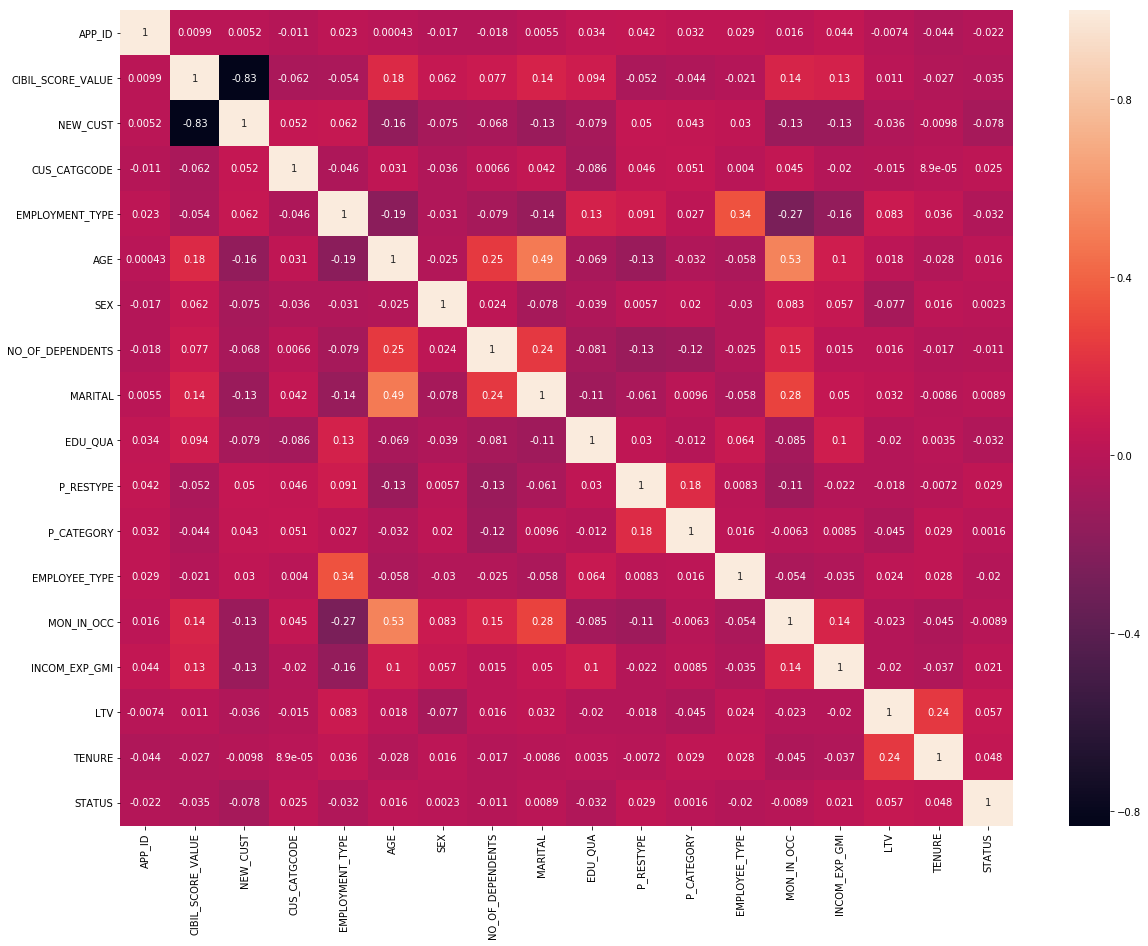

In [9]:
# Co-relation plot of all the feature vectors that are highly co-related with the target variable.

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)
plt.show()

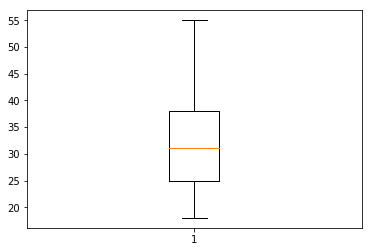

In [10]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["AGE"], flierprops=red_circle)
plt.show()

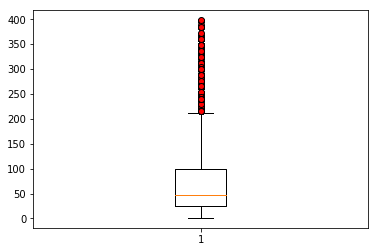

In [11]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["MON_IN_OCC"], flierprops=red_circle)
plt.show()

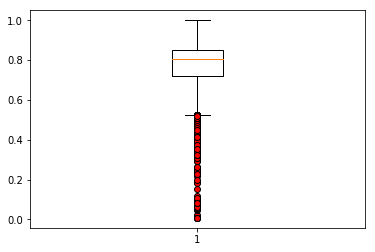

In [12]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["LTV"], flierprops=red_circle)
plt.show()

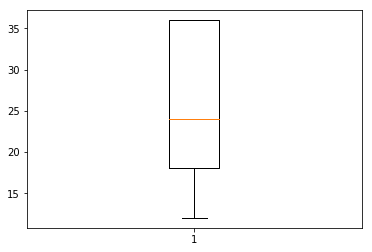

In [13]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["TENURE"], flierprops=red_circle)
plt.show()

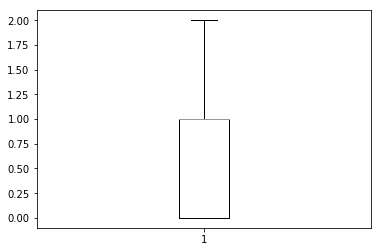

In [14]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["EMPLOYEE_TYPE"], flierprops=red_circle)
plt.show()

In [15]:
# # Dealing with outliers using the capping method. Rather than deleting the outliers capping the outlieres are better choice.
# # Capping method is a method where I have added the outliers that was present to the left and right tail of the normal distrubution.

for i in df.columns:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[i] = np.where(df[i] > upper_limit, upper_limit, 
    np.where(
        df[i] < lower_limit, lower_limit, df[i]
    ))

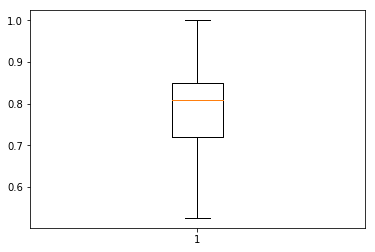

In [16]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["LTV"], flierprops=red_circle)
plt.show()

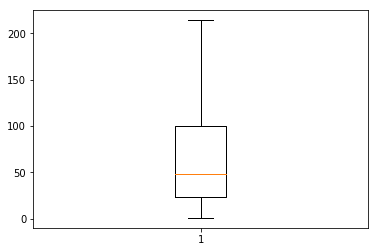

In [17]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["MON_IN_OCC"], flierprops=red_circle)
plt.show()

In [18]:
X = df.drop(columns= "STATUS")
X

APP_ID  CIBIL_SCORE_VALUE  NEW_CUST  CUS_CATGCODE  EMPLOYMENT_TYPE  \
0      12345.0                0.0       1.0           1.0              0.0   
1      12347.0                0.0       0.0           1.0              1.0   
2      12349.0                0.0       1.0           1.0              0.0   
3      12351.0                2.0       0.0           1.0              1.0   
4      12353.0                2.0       0.0           1.0              1.0   
5      12355.0                0.0       1.0           1.0              1.0   
6      12357.0                0.0       1.0           1.0              0.0   
7      12359.0                0.0       1.0           1.0              1.0   
8      12361.0                2.0       0.0           1.0              0.0   
9      12363.0                0.0       1.0           1.0              1.0   
10     12365.0                0.0       1.0           1.0              0.0   
11     12367.0                1.0       0.0           1.0              1.0   
12     12369.0                1.0       0.0           1.0              1.0   
13     12371.0                2.0       0.0           1.0              1.0   
14     12373.0                1.0       0.0           1.0              0.0   
15     12375.0                2.0       0.0           1.0              1.0   
16     12377.0                0.0       1.0           1.0              1.0   
17     12379.0                1.0       0.0           1.0              1.0   
18     12381.0                0.0       1.0           1.0              1.0   
19     12383.0                0.0       1.0           1.0              1.0   
20     12385.0                2.0       0.0           1.0              0.0   
21     12387.0                2.0       0.0           1.0              0.0   
22     12389.0                0.0       1.0           1.0              1.0   
23     12391.0                0.0       1.0           1.0              0.0   
24     12393.0                2.0       0.0           1.0              0.0   
25     12395.0                0.0       1.0           1.0              0.0   
26     12397.0                0.0       1.0           1.0              1.0   
27     12399.0                1.0       0.0           1.0              0.0   
28     12401.0                2.0       0.0           1.0              1.0   
29     12403.0                0.0       1.0           1.0              0.0   
...        ...                ...       ...           ...              ...   
13269  38883.0                1.0       0.0           1.0              1.0   
13270  38885.0                1.0       0.0           1.0              1.0   
13271  38887.0                2.0       0.0           1.0              1.0   
13272  38889.0                0.0       0.0           1.0              0.0   
13273  38891.0                0.0       0.0           1.0              0.0   
13274  38893.0                2.0       0.0           1.0              1.0   
13275  38895.0                1.0       0.0           1.0              1.0   
13276  38897.0                0.0       1.0           1.0              1.0   
13277  38899.0                0.0       1.0           1.0              1.0   
13278  38901.0                2.0       0.0           1.0              1.0   
13279  38903.0                0.0       1.0           1.0              1.0   
13280  38905.0                0.0       1.0           1.0              0.0   
13281  38907.0                0.0       1.0           1.0              1.0   
13282  38909.0                0.0       1.0           1.0              1.0   
13283  38911.0                0.0       1.0           1.0              1.0   
13284  38913.0                2.0       0.0           1.0              1.0   
13285  38915.0                0.0       1.0           1.0              1.0   
13286  38917.0                2.0       0.0           1.0              1.0   
13287  38919.0                1.0       0.0           1.0              0.0   
13288  38921.0                

In [19]:
y = df[["STATUS"]]
y

STATUS
0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        1.0
11        1.0
12        1.0
13        1.0
14        0.0
15        0.0
16        0.0
17        1.0
18        0.0
19        1.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        1.0
26        0.0
27        1.0
28        1.0
29        0.0
...       ...
13269     1.0
13270     1.0
13271     1.0
13272     0.0
13273     0.0
13274     0.0
13275     1.0
13276     0.0
13277     0.0
13278     0.0
13279     0.0
13280     0.0
13281     0.0
13282     0.0
13283     0.0
13284     1.0
13285     0.0
13286     1.0
13287     1.0
13288     1.0
13289     1.0
13290     0.0
13291     0.0
13292     0.0
13293     0.0
13294     1.0
13295     1.0
13296     1.0
13297     0.0
13298     0.0

[13299 rows x 1 columns]

In [20]:
# Splitting the train and test data in X_train, X_test, y_train and y_test
# Where, 
# X_train and y_train will be for training.
# X_test and y_test will be for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)
print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

X train: (9974, 17)
X test: (3325, 17)
y train: (9974, 1)
y test: (3325, 1)


In [33]:
# Using sklearn's LogisticRegression model and training it with train datasets.

log_model = LogisticRegression() 
log_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [32]:
## Hyper-Parameter tuning - Accuracy is decreasing. Given accuracy 54%
# log_model = LogisticRegression(penalty = 'l2', C=10, fit_intercept = True, intercept_scaling = 1, class_weight='balanced', random_state = 42, solver='saga') 
# log_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, class_weight='balanced', random_state=42,
                   solver='saga')

In [34]:
y_pred = log_model.predict(X_test) # Predicting on test dataset
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
# Evaluating the model accuracy of Logistic Regression model

# Accuracy = r2_score(y_test['No'], y_pred) * 100
Accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Accuracy is: {Accuracy}")

Accuracy is: 63.21804511278195


In [36]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

In [38]:
## HyperParameter tuning - Random forest Classifier Accuracy is increasing:- 67%
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth= 30, min_samples_split= 20, min_samples_leaf=20)
clf.fit(X_train, y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(max_depth=30, min_samples_leaf=20, min_samples_split=20)

In [39]:
y_pred = clf.predict(X_test) # Predicting on test dataset
Accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Accuracy is: {Accuracy}")

Accuracy is: 67.42857142857143


### RandomForestClassifier :- 67%